# **Лабораторная работа №2**

In [ ]:

import numpy as np

import matplotlib.pyplot as plt



from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## Задание 1

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?


In [ ]:
import pandas as pd

data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]


df = pd.DataFrame(data, columns=['weather', 'stroll'])
df

,weather,stroll
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [ ]:
p_rain =  len(df.loc[df['weather'] == 'дождь']) / len(df)
p_stroll = len(df.loc[df['stroll'] == True]) / len(df)
p_rain_if_stroll = len(df.loc[(df['weather'] == 'дождь') & (df['stroll'] == True)]) / len(df.loc[df['stroll'] == True])
print(f'Вероятность отправиться на прогулку, если пойдет дождь равна: {(p_stroll*p_rain_if_stroll)/p_rain}')

Вероятность отправиться на прогулку, если пойдет дождь равна: 0.3333333333333333


## Задание 2

- загрузите датасет для классификации, проведите предобработку, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;

In [ ]:
data = pd.read_csv("airlines_task.csv").drop_duplicates()
data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,400740,XE,3036,IAH,CHS,4.0,1195,131.0,0.0
1,194808,UA,315,DEN,ONT,7.0,707,145.0,0.0
2,526903,OO,6673,SFO,MRY,5.0,499,42.0,1.0
3,477937,WN,3668,PHX,ONT,2.0,810,70.0,1.0
4,48180,AS,623,LAS,PDX,5.0,985,143.0,0.0
...,...,...,...,...,...,...,...,...,...
80003,433294,AA,505,JFK,SJU,7.0,415,245.0,0.0
80004,473271,OO,4712,SAN,LAX,2.0,570,44.0,0.0
80005,52193,FL,158,BWI,IND,5.0,1195,104.0,0.0
80006,534059,MQ,3869,ORD,SAT,5.0,885,175.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80008 entries, 0 to 80007
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           80008 non-null  int64  
 1   Airline      79868 non-null  object 
 2   Flight       80008 non-null  int64  
 3   AirportFrom  80008 non-null  object 
 4   AirportTo    79754 non-null  object 
 5   DayOfWeek    79940 non-null  float64
 6   Time         80008 non-null  int64  
 7   Length       79896 non-null  float64
 8   Delay        80007 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 6.1+ MB


### Заполнение пустых значений

In [ ]:
import numpy as np
from scipy.stats import *

for column in data.columns:
  if data[column].dtype == 'float64':
    valuesNotNaN = data[column].dropna()
    data[column] = data[column].fillna(round(sum(valuesNotNaN)/len(valuesNotNaN)))
  elif data[column].dtype == 'object':
    valuesNotNaN = data[column].dropna()
    data[column] = data[column].fillna(mode(valuesNotNaN).mode[0])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80008 entries, 0 to 80007
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           80008 non-null  int64  
 1   Airline      80008 non-null  object 
 2   Flight       80008 non-null  int64  
 3   AirportFrom  80008 non-null  object 
 4   AirportTo    80008 non-null  object 
 5   DayOfWeek    80008 non-null  float64
 6   Time         80008 non-null  int64  
 7   Length       80008 non-null  float64
 8   Delay        80008 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 6.1+ MB


In [ ]:
data.corr()

,id,Flight,DayOfWeek,Time,Length,Delay
id,1.000000,-0.008736,-0.049406,0.050394,0.031678,0.396506
Flight,-0.008736,1.000000,0.006621,-0.003441,-0.343310,-0.045194
DayOfWeek,-0.049406,0.006621,1.000000,-0.005674,0.013877,-0.018472
Time,0.050394,-0.003441,-0.005674,1.000000,-0.018507,0.133392
Length,0.031678,-0.343310,0.013877,-0.018507,1.000000,0.039820
Delay,0.396506,-0.045194,-0.018472,0.133392,0.039820,1.000000


### Перевод категориальных признаков в числовой тип данных

In [ ]:
data.loc[:, ["Airline", "AirportFrom", "AirportTo", "Flight"]].nunique(axis=0)
data.dropna(inplace=True)
data_encoded = pd.get_dummies(data, columns=["Airline"], dtype=int).reset_index(drop=True)
routes = pd.Series(data=(data_encoded.AirportTo + data_encoded.AirportFrom), name="Route")
routes
data_encoded: pd.DataFrame = pd.concat([data_encoded, routes], axis=1).drop(["AirportTo", "AirportFrom"], axis=1)
data_encoded.rename({0: "Route"}, axis=1, inplace=True)
data_encoded.Route.value_counts()
label_map = dict(zip(data_encoded.Route.unique().tolist(), np.arange(0, data_encoded.Route.unique().shape[0])))
label_map
data_encoded.Route
data_encoded.Route = data_encoded.Route.map(lambda x: label_map.get(x))
data_encoded.Route


0           0
1           1
2           2
3           3
4           4
         ... 
80003    2214
80004      93
80005     956
80006     355
80007    2369
Name: Route, Length: 80008, dtype: int64

### Выделение целевого признака и предикторов

In [ ]:
Y = data_encoded.Delay
X = data_encoded.drop(columns=["Delay"], axis=1)

In [ ]:
Y

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
80003    0.0
80004    0.0
80005    0.0
80006    1.0
80007    0.0
Name: Delay, Length: 80008, dtype: float64

In [ ]:
X

,id,Flight,DayOfWeek,Time,Length,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV,Route
0,400740,3036,4.0,1195,131.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,194808,315,7.0,707,145.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,526903,6673,5.0,499,42.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,477937,3668,2.0,810,70.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
4,48180,623,5.0,985,143.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80003,433294,505,7.0,415,245.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2214
80004,473271,4712,2.0,570,44.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,93
80005,52193,158,5.0,1195,104.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,956
80006,534059,3869,5.0,885,175.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,355


- В случае дисбаланса проведите балансировку

### Балансировка




In [ ]:
from imblearn.under_sampling import RandomUnderSampler

print(f"Количество объектов каждого класса до under_sampling: \n{Y.value_counts()}")
underSampler = RandomUnderSampler(sampling_strategy='majority')
X_under_sample, Y_under_sample = underSampler.fit_resample(X, Y)
print(f"Количество объектов каждого класса после under_sampling: \n{Y_under_sample.value_counts()}")

Количество объектов каждого класса до under_sampling: 
0.0    59885
1.0    20123
Name: Delay, dtype: int64
Количество объектов каждого класса после under_sampling: 
0.0    20123
1.0    20123
Name: Delay, dtype: int64


In [ ]:
X

,id,Flight,DayOfWeek,Time,Length,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV,Route
0,400740,3036,4.0,1195,131.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,194808,315,7.0,707,145.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,526903,6673,5.0,499,42.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,477937,3668,2.0,810,70.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
4,48180,623,5.0,985,143.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80003,433294,505,7.0,415,245.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2214
80004,473271,4712,2.0,570,44.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,93
80005,52193,158,5.0,1195,104.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,956
80006,534059,3869,5.0,885,175.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,355


### Разбиение на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_under_sample, Y_under_sample, test_size=0.2, random_state = 4)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((32196, 24), (32196,), (8050, 24), (8050,))

- Масштабируйте числовые признаки

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train, Y_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
X_train_std

array([[ 1.06340291,  0.44785909, -0.51866499, ..., -0.25126808,
        -0.15942281, -0.90899674],
       [ 0.94689109, -0.42624669, -1.08167707, ..., -0.25126808,
        -0.15942281, -1.21935078],
       [-0.34534973, -0.6789065 ,  0.04434708, ..., -0.25126808,
        -0.15942281,  0.20063831],
       ...,
       [-0.93067313, -0.09633128,  0.60735915, ..., -0.25126808,
        -0.15942281,  1.21859955],
       [ 0.81842292,  0.52754411, -1.64468914, ..., -0.25126808,
        -0.15942281,  2.29003718],
       [-1.93832203,  0.16604622, -0.51866499, ..., -0.25126808,
        -0.15942281,  0.41358892]])

In [ ]:
X_test_std

array([[-1.79261958,  2.22959667,  0.04434708, ..., -0.25126808,
        -0.15942281,  0.29613186],
       [ 0.17964757, -0.9199051 , -1.08167707, ..., -0.25126808,
        -0.15942281,  0.51576702],
       [-1.48074514, -0.57492727,  1.7333833 , ..., -0.25126808,
        -0.15942281, -0.47545603],
       ...,
       [ 0.39908192, -1.11668822,  0.04434708, ..., -0.25126808,
        -0.15942281, -0.59482296],
       [ 0.07910407, -0.67550531, -1.64468914, ..., -0.25126808,
        -0.15942281, -1.35017694],
       [-1.12339985, -0.62788866,  0.04434708, ..., -0.25126808,
        -0.15942281, -0.61392167]])

- решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.

### Метрики

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [ ]:
def plot_roc_curve(y_true, probs):
    probs = probs[:, 1]
    auc_ = roc_auc_score(y_true, probs)
    print(' ROC AUC=%.3f' % (auc_))
    fpr, tpr, treshold = roc_curve(y_true, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='purple',
            label='ROC кривая (AUC = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def showMetrics(Y_true, Y_predict, Y_proba):
    print(f"Accuracy: {accuracy_score(Y_true, Y_predict)}")
    print(f"Confusion matrix:\n {confusion_matrix(Y_true, Y_predict)}")
    print(f"Precision, Recall, F-score:\n{classification_report(Y_true, Y_predict)}")
    plot_roc_curve(Y_true, Y_proba)

### Метод k-ближайших соседей

Fitting 10 folds for each of 29 candidates, totalling 290 fits
{'n_neighbors': 20}
Accuracy: 0.7662111801242236
Confusion matrix:
 [[2957 1111]
 [ 771 3211]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      4068
         1.0       0.74      0.81      0.77      3982

    accuracy                           0.77      8050
   macro avg       0.77      0.77      0.77      8050
weighted avg       0.77      0.77      0.77      8050

 ROC AUC=0.848


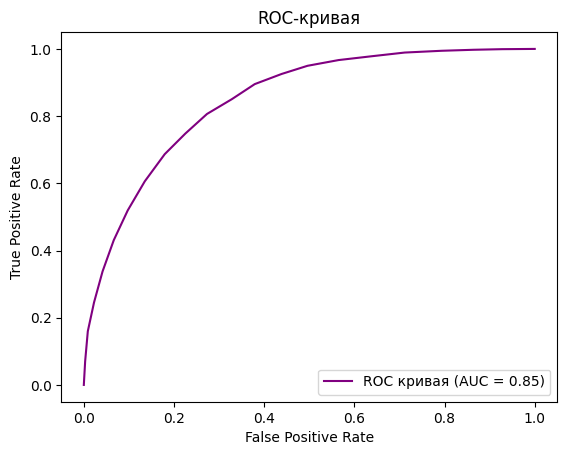

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train_std, Y_train)

y_knn_predict = knn.predict(X_test_std)
knn_probs = knn.predict_proba(X_test_std)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
grid_search=grid.fit(X_train_std, Y_train)
print(grid_search.best_params_)

knn_pred = grid.predict(X_test_std)
grid_knn_probs = grid.predict_proba(X_test_std)
showMetrics(Y_test, knn_pred,  grid_knn_probs)

In [ ]:
def GNB(X_train, Y_train, X_test, Y_test):
    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
    gnb = GaussianNB()
    gs = RandomizedSearchCV(gnb, param_distributions=params_NB, cv=5,verbose=1,
                 scoring='accuracy')
    gs.fit(X_train, Y_train)
    print(gs.best_params_)
    gnb_pred = gs.predict(X_test)
    gnb_probs = gs.predict_proba(X_test)
    showMetrics(Y_test, gnb_pred, gnb_probs)


Данные без масштабирования
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'var_smoothing': 1.873817422860387e-09}
Accuracy: 0.7157763975155279
Confusion matrix:
 [[2643 1425]
 [ 863 3119]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

         0.0       0.75      0.65      0.70      4068
         1.0       0.69      0.78      0.73      3982

    accuracy                           0.72      8050
   macro avg       0.72      0.72      0.71      8050
weighted avg       0.72      0.72      0.71      8050

 ROC AUC=0.781


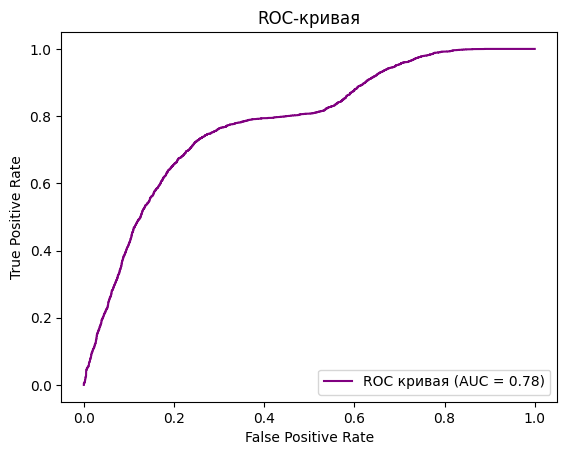

Данные с стандартизацией
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'var_smoothing': 5.336699231206302e-08}
Accuracy: 0.6690683229813664
Confusion matrix:
 [[2370 1698]
 [ 966 3016]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

         0.0       0.71      0.58      0.64      4068
         1.0       0.64      0.76      0.69      3982

    accuracy                           0.67      8050
   macro avg       0.68      0.67      0.67      8050
weighted avg       0.68      0.67      0.67      8050

 ROC AUC=0.711


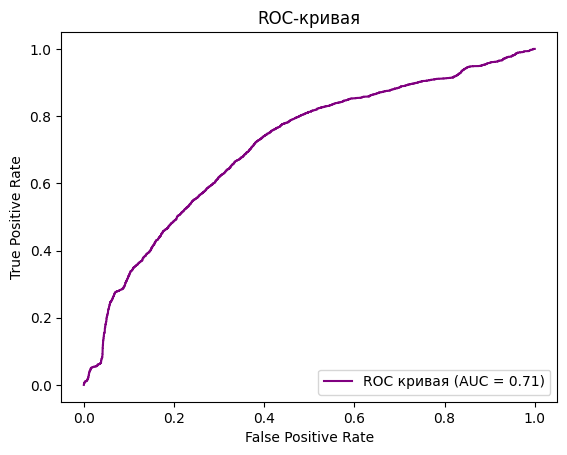

In [ ]:
print("Данные без масштабирования")
GNB(X_train, Y_train, X_test, Y_test)
print("Данные с стандартизацией")
GNB(X_train_std, Y_train, X_test_std, Y_test)

### Логистическая регрессия

In [ ]:
def LogisticRegressionFunc(X_train, y_train, X_test, y_test):
    logistic = LogisticRegression(random_state=0)
    distributions = dict(C= np.arange(1,10,0.1),penalty=['l2', 'l1'])
    clf = RandomizedSearchCV(logistic, distributions, random_state=0)
    search = clf.fit(X_train, y_train)
    print(search.best_params_)
    best_params = search.best_params_
    logRes = LogisticRegression(penalty=best_params["penalty"], C= best_params["C"])
    logRes.fit(X_train, y_train)
    pred = logRes.predict(X_test)
    probs = logRes.predict_proba(X_test)
    showMetrics(y_test, pred, probs)

Данные без масштабирования
{'penalty': 'l2', 'C': 6.300000000000004}
Accuracy: 0.6785093167701863
Confusion matrix:
 [[2434 1634]
 [ 954 3028]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

         0.0       0.72      0.60      0.65      4068
         1.0       0.65      0.76      0.70      3982

    accuracy                           0.68      8050
   macro avg       0.68      0.68      0.68      8050
weighted avg       0.68      0.68      0.68      8050

 ROC AUC=0.729


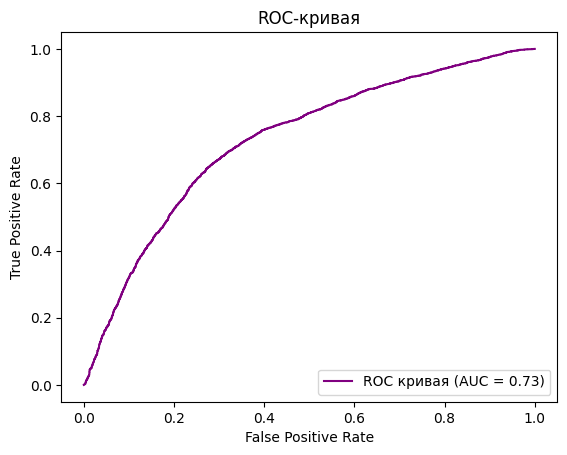

Данные с стандартизацией
{'penalty': 'l2', 'C': 6.300000000000004}
Accuracy: 0.7452173913043478
Confusion matrix:
 [[2892 1176]
 [ 875 3107]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      4068
         1.0       0.73      0.78      0.75      3982

    accuracy                           0.75      8050
   macro avg       0.75      0.75      0.75      8050
weighted avg       0.75      0.75      0.74      8050

 ROC AUC=0.809


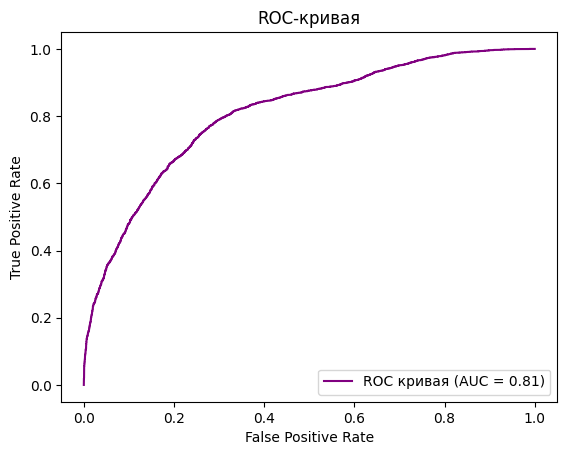

In [ ]:
print("Данные без масштабирования")
LogisticRegressionFunc(X_train, Y_train, X_test, Y_test )
print("Данные с стандартизацией")
LogisticRegressionFunc(X_train_std, Y_train, X_test_std, Y_test )

In [ ]:
def SVMCall(X_train, y_train, X_test, y_test):
    param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1],
              'kernel': ['rbf']}

    grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
    search = grid.fit(X_train, y_train)
    print(search.best_params_)
    pred = grid.predict(X_test)
    probs = grid.predict_proba(X_test)
    showMetrics(y_test, pred, probs)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=10.2min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time= 9.3min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time= 9.7min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=10.5min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time= 8.7min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.501 total time= 8.9min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.501 total time= 8.2min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.501 total time= 8.5min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.501 total time= 8.3min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.501 total time= 8.1min
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.501 total time=11.6min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;,

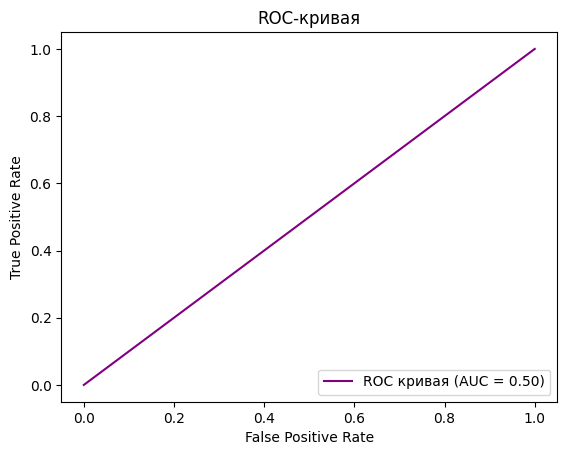

In [ ]:
SVMCall(X_train, Y_train, X_test, Y_test )

## Задание 3
* Самостоятельно реализуйте метрики Accuracy, Precision, Recall, F1

In [ ]:
class MetricsClassification:
    @staticmethod
    def accuracy(y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        return len([x for x, y  in zip(y_true, predictions) if x  == y])/len(y_true)

    @staticmethod
    def confusion_matrix(y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        TP = FP =TN =FN = 0
        for test, pred in zip(y_true, predictions):
            if (test == 1 and pred == 1):
                TP += 1
            elif (test == 0 and pred == 0):
                TN += 1
            elif (test == 1 and pred == 0):
                FN += 1
            elif (test == 0 and pred == 1):
                FP += 1
        return [[TP, FP], [FN, TN]]
    @staticmethod
    def precision( y_test, y_pred):
        matrix = MetricsClassification.confusion_matrix(y_test, y_pred)
        TP = matrix[0][0]
        FP = matrix[0][1]
        return TP/(TP + FP)
    @staticmethod
    def recall(y_test, y_pred):
        matrix = MetricsClassification.confusion_matrix(y_test, y_pred)
        TP = matrix[0][0]
        FN = matrix[1][0]
        return TP/(TP + FN)

    @staticmethod
    def f_score(y_test, y_pred):
        recall_score = MetricsClassification.recall(y_test, y_pred)
        precision_score = MetricsClassification.precision(y_test, y_pred)
        return 2*(recall_score * precision_score)/ (recall_score+precision_score)

In [ ]:
def ShowMetrics(y_true, y_pred):
  print("Собственная ----- Библиотека")
  print(f"{MetricsClassification.accuracy(y_true, y_pred)} ----- {accuracy_score(y_true, y_pred)}")
  print(f"{MetricsClassification.confusion_matrix(y_true, y_pred)} ----- {confusion_matrix(y_true, y_pred)}")
  print(f"{MetricsClassification.precision(y_true, y_pred)} ----- {precision_score(y_true, y_pred)}")
  print(f"{MetricsClassification.recall(y_true, y_pred)} ----- {recall_score(y_true, y_pred)}")
  print(f"{MetricsClassification.f_score(y_true, y_pred)} ----- {f1_score(y_true, y_pred)}")

### Собственная реализация knn

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))

In [ ]:
def get_distances_(x_test, x_train):
        distances = []
        for x in x_train:
            distance = euclidean_distance(x_test, x)
            distances.append(distance)
        return distances

In [ ]:
def most_common(list):
    return max(set(list), key=list.count)

In [ ]:
class KNeighborsClassifier:
    def __init__( self, k) :
        self.k = k
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        return self

    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = get_distances_(x, self.x_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))][:self.k]
            neighbors.append(y_sorted)
        return list(map(most_common, neighbors))

In [ ]:
class NaiveBayes:
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        self.n_classes = len(self._classes)

        self.mean = np.zeros((self.n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((self.n_classes, n_features), dtype=np.float64)
        self.priors = np.zeros(self.n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]

            self.mean[idx, :] = X_c.mean(axis=0)

            self.var[idx, :] = X_c.var(axis=0)

            self.priors[idx] = X_c.shape[0] / float(n_samples)
        return self

    def predict(self, X):
        y_pred = []
        for x_test in X:
            p = {}

            for index_class in range(self.n_classes):
                p[index_class] = self.priors[index_class]

                for index, feature in enumerate(x_test):
                    p[index_class] *= self.gaussian_density(feature, self.mean[index_class][index],self.var[index_class][index])
            y_pred.append(pd.Series(p).values.argmax())
        return y_pred

    def gaussian_density(self, x, mean, var):
        if(var == 0):
            return 1
        const = 1 / np.sqrt(var * 2 * np.pi)
        proba = np.exp(-0.5 * ((x - mean) ** 2 / var))
        result = const * proba
        return result